In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib inline

In [6]:
ROWS = 28
COLS = 28

train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [8]:
# labels from kaggle
labels = { 
0: 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'
}

In [9]:
def get_samples(data):
    sample_img = []
    sample_label = []
    
    for i in labels.keys():
        # get 2 images from each category
        
        samples = data[data['label'] == i].head(2)
        
        for index, sample in enumerate(samples.values):
            img = np.array(samples.iloc[index,1:]).reshape(ROWS,COLS)
            sample_img.append(img)
            
            sample_label.append(samples.iloc[index, 0])
        
    return sample_img, sample_label

train_sample_img, train_sample_label = get_samples(train_data)

print(train_sample_img)

[array([[  0,   0,   0,   1,   2,   0,   0,   0,   0,   0, 114, 183, 112,
         55,  23,  72, 102, 165, 160,  28,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,   0,  24, 188, 163,  93, 136, 153,
        168, 252, 174, 136, 166, 130, 123, 131,  66,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   2,   0,  10, 157, 216, 226, 208, 142,  66, 115,
        149, 230, 190, 196, 198, 172, 222, 107, 165, 211,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 118, 214, 174, 168, 109, 200, 124, 150,
        143,  58,  63,  89, 137,  97, 168, 138, 142, 195, 156,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 140,  70,  80,  43,  71,  96,  93, 151,
        121, 197, 143, 107,  82, 101, 111,  80, 137, 193, 208,   6,   0,
          0,   0],
       [  0,   0,   0,   0,  74, 194, 107, 146, 178, 185, 182,  77, 185,
        218, 210, 175, 174, 235, 217, 217, 129, 180, 210, 208,  89,   0,
          0,   0],
       [ 

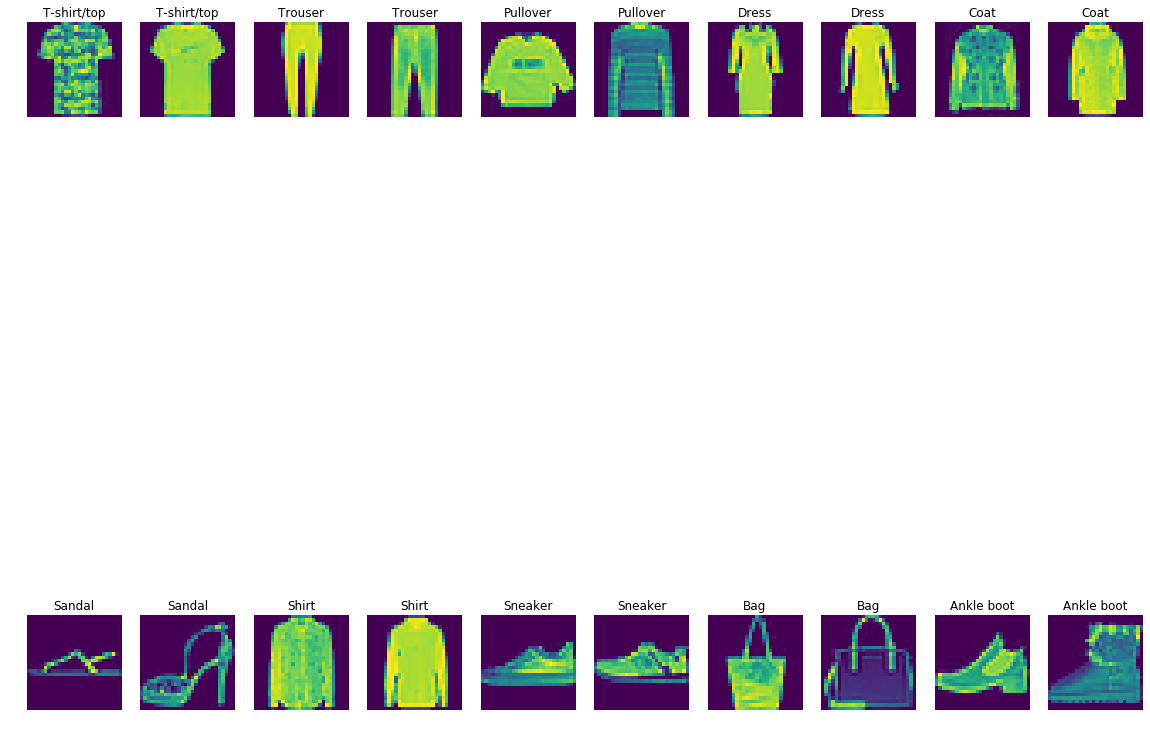

In [10]:
def plot_img(images, image_labels):
    fig, axes = plt.subplots(2, 10, figsize=(20,20))
    
    for i, image in enumerate(images):
        axes[i//10, i%10].imshow(image)
        axes[i//10, i%10].axis('off')
        axes[i//10, i%10].set_title(labels[image_labels[i]])
    
    plt.show()
    
plot_img(train_sample_img, train_sample_label)

In [24]:
def  process_data(raw_data):
    out_y = keras.utils.to_categorical(raw_data.label, 10)
    num_images = raw_data.shape[0]
    
    image_data_arr = raw_data.values[:, 1:]
    
    out_x = image_data_arr.reshape(num_images, ROWS, COLS, 1) / 255
    
    return out_x, out_y

x,y = process_data(train_data)
x_test,y_test = process_data(test_data)

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2,random_state=50)

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', input_shape=(ROWS,COLS,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

In [15]:
train_model = model.fit(x_train, y_train, batch_size=256, epochs=50, verbose=1, validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 26s 537us/step - loss: 0.7387 - acc: 0.7353 - val_loss: 0.5133 - val_acc: 0.8134
Epoch 2/50
48000/48000 [==============================] - 23s 486us/step - loss: 0.4720 - acc: 0.8283 - val_loss: 0.4785 - val_acc: 0.8218
Epoch 3/50
48000/48000 [==============================] - 23s 489us/step - loss: 0.4114 - acc: 0.8512 - val_loss: 0.4237 - val_acc: 0.8471
Epoch 4/50
48000/48000 [==============================] - 23s 489us/step - loss: 0.3748 - acc: 0.8629 - val_loss: 0.4122 - val_acc: 0.8546
Epoch 5/50
48000/48000 [==============================] - 23s 486us/step - loss: 0.3502 - acc: 0.8725 - val_loss: 0.3579 - val_acc: 0.8712
Epoch 6/50
48000/48000 [==============================] - 24s 491us/step - loss: 0.3222 - acc: 0.8820 - val_loss: 0.3574 - val_acc: 0.8724
Epoch 7/50
48000/48000 [==============================] - 23s 486us/

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score[1])

0.8945


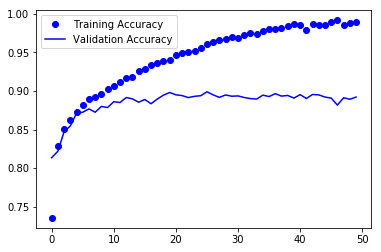

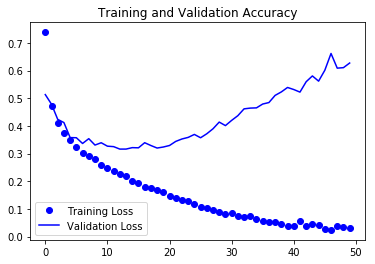

In [27]:
accuracy = train_model.history['acc']
val_accuracy = train_model.history['val_acc']
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [28]:
predicted = model.predict_classes(x_test)
y_true = test_data.iloc[:, 0]

In [32]:
p = predicted[:10000]
y = y_true[:10000]
correct = np.nonzero(p == y)[0]
incorrect = np.nonzero(p != y)[0]

print('Correct: ', correct.shape[0])
print('Incorrect: ', incorrect.shape[0])

Correct:  8945
Incorrect:  1055


In [35]:
target_names = ['Class %s (%s)' % (i, labels[i]) for i in range(10)]
print(classification_report(y_true, predicted, target_names=target_names))

                       precision    recall  f1-score   support

Class 0 (T-shirt/top)       0.85      0.82      0.84      1000
    Class 1 (Trouser)       0.99      0.98      0.98      1000
   Class 2 (Pullover)       0.86      0.79      0.82      1000
      Class 3 (Dress)       0.91      0.89      0.90      1000
       Class 4 (Coat)       0.80      0.88      0.84      1000
     Class 5 (Sandal)       0.95      0.98      0.97      1000
      Class 6 (Shirt)       0.72      0.74      0.73      1000
    Class 7 (Sneaker)       0.94      0.96      0.95      1000
        Class 8 (Bag)       0.97      0.97      0.97      1000
 Class 9 (Ankle boot)       0.97      0.92      0.95      1000

            micro avg       0.89      0.89      0.89     10000
            macro avg       0.90      0.89      0.89     10000
         weighted avg       0.90      0.89      0.89     10000

